# Logistic 回归——Pima Indians Diabetes Data Set

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段: 
0列为怀孕次数；
1列为口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度；
2列为舒张压（单位:mm Hg）
3列为三头肌皮褶厚度（单位：mm）
4列为餐后血清胰岛素（单位:mm）
5列为体重指数（体重（公斤）/ 身高（米）^2）
6列为糖尿病家系作用
7列为年龄
8列为分类变量（0或1）

数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [16]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot

## 读取数据 

In [17]:
# 读取数据
train = pd.read_csv("FE_pima-indians-diabetes.csv")
train.head()

,instant,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
instant                         768 non-null int64
pregnants                       768 non-null float64
Plasma_glucose_concentration    768 non-null float64
blood_pressure                  768 non-null float64
Triceps_skin_fold_thickness     768 non-null float64
serum_insulin                   768 non-null float64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null float64
Target                          768 non-null int64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [19]:
# 用train_test_split 分割训练数据和测试数据
from sklearn.model_selection import train_test_split
#  get labels
y = train['Target']   
X = train.drop(["Target"], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

#保存测试ID，用于提交结果
testID=X_test["instant"]

X_train.drop(["instant"],axis=1,inplace=True)
X_test.drop(["instant"],axis=1,inplace=True)
#用于特征重要性可视化
feat_names = X_train.columns
print(feat_names)

Index(['pregnants', 'Plasma_glucose_concentration', 'blood_pressure',
       'Triceps_skin_fold_thickness', 'serum_insulin', 'BMI',
       'Diabetes_pedigree_function', 'Age'],
      dtype='object')


/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## 模型训练

### default Logistic Regression


In [20]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [21]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.model_selection import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print 'logloss of each fold is: ',-loss
print'cv logloss is:', -loss.mean()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('logloss of each fold is: ',-loss)? (<ipython-input-21-e7f59234b9f0>, line 5)

### 正则化的 Logistic Regression及参数调优
这部分用交叉验证GridSearchCV、LogisticRegressionCV任意一种方式均可

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 
目标函数为：J = C* sum(logloss(f(xi), yi)) +  penalty 

在sklearn框架下，不同学习器的参数调整步骤相同：
设置候选参数集合
生成一个GridSearchCV的实例
调用GridSearchCV的fit函数

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [23]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.49130572687725915
{'C': 1, 'penalty': 'l2'}


/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


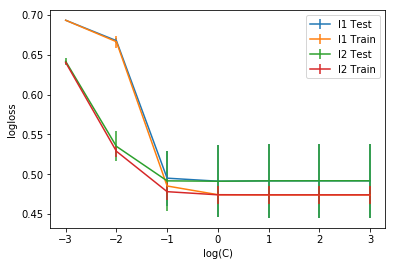

In [24]:
# plot CV误差曲线
test_means = -grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = -grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]

# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores =  np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

上图给出了L1正则和L2正则下、不同正则参数C对应的模型在训练集上测试集上的正确率（score）。可以看出在训练集上C越大（正则越少）的模型性能越好；但在测试集上当C=1时性能最好（L1正则）

## 换正确率做评价指标

In [25]:
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()

#缺省scoring为正确率
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5)
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

0.760586319218241
{'C': 0.1, 'penalty': 'l2'}


/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/xumeiyu/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


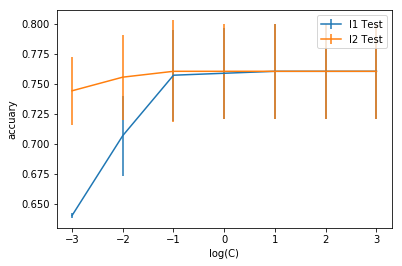

In [26]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]

# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores =  np.array(test_means).reshape(n_Cs,number_penaltys)
#train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
#train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    #pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuary' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

In [27]:
print(grid.best_params_['penalty'])
print(grid.best_params_['C'])

l2
0.1


In [28]:
grid.best_estimator_.coef_

array([[ 0.27849681,  0.97188937, -0.11111155,  0.0074883 , -0.06657056,
         0.5504485 ,  0.2388094 ,  0.19798827]])

In [29]:
df = pd.DataFrame({"columns":list(feat_names), "coeffient":list(grid.best_estimator_.coef_.T)})
df.sort_values(by=['coeffient'],ascending=False)

,columns,coeffient
1,Plasma_glucose_concentration,[0.9718893711567456]
5,BMI,[0.5504485030154497]
0,pregnants,[0.2784968123000165]
6,Diabetes_pedigree_function,[0.23880939564490145]
7,Age,[0.19798827196881064]
3,Triceps_skin_fold_thickness,[0.007488299908655037]
4,serum_insulin,[-0.06657055503604102]
2,blood_pressure,[-0.11111154779393324]


In [30]:
y_test_pred=grid.predict(X_test)
df=pd.DataFrame({"instant":testID,"target":y_test_pred})
df.to_csv("submission.csv",index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 661 to 380
Data columns (total 2 columns):
instant    154 non-null int64
target     154 non-null int64
dtypes: int64(2)
memory usage: 3.6 KB
